<a href="https://www.kaggle.com/code/muhammedtausif/top-songs-eda?scriptVersionId=167685633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style='text-align:center'> 
    <span style="border-radius:100px; width:500px;padding-left:100px; padding-right:100px; font-size:30px;text-align:center;background-color:blue; color:yellow"> 
    *** EDA ***
    </span>
</div>


<div style="border-radius:100px;padding:20px; font-size:50px;text-align:center;background-color:red; color:yellow"> Top Spotify Songs 2021</div>
<br>


# <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> About Spotify </div>

<b>
    Spotify is a Swedish music streaming and media services provider where users can listen to their Favourite Artists, Songs and Albums.Founded in 2006, the company mainly provides an audio streaming platform, the "Spotify" platform, that offers DRM-restricted music and podcasts from record labels and media companies. As a freemium service, basic features are free with advertisements or automatic music videos. Additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions.
    </b>

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Top 50 Spotify Songs-2021</div>

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Importing the relevant libraries and dataset </div>

In [1]:
# importing pandas, numpy, plotly, seaborn, and itializing the libs
# These libs are important for data wrangling, cleaning and visualization.
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-top-50-songs-in-2021/spotify_top50_2021.csv
/kaggle/input/tiktok-popular-songs-2022/TikTok_songs_2022.csv
/kaggle/input/top50spotify2019/top50.csv
/kaggle/input/spotify-12m-songs/tracks_features.csv
/kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv
/kaggle/input/dataset-of-songs-in-spotify/playlists.csv
/kaggle/input/top-100-songs/top 100 streamed_songs.csv
/kaggle/input/500-greatest-songs-of-all-time/Top 500 Songs.csv


## Loading data from dataset.

In [3]:
df = pd.read_csv('../input/spotify-top-50-songs-in-2021/spotify_top50_2021.csv')

### Displaying the head records

In [4]:
df.head()

id     artist_name                      track_name                track_id  \
0   1  Olivia Rodrigo                 drivers license  5wANPM4fQCJwkGd4rN57mH   
1   2       Lil Nas X  MONTERO (Call Me By Your Name)  1SC5rEoYDGUK4NfG82494W   
2   3   The Kid LAROI       STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX   
3   4  Olivia Rodrigo                        good 4 u  4ZtFanR9U6ndgddUvNcjcG   
4   5        Dua Lipa       Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          92         0.561   0.431   10    -8.810     1       0.0578   
1          90         0.593   0.503    8    -6.725     0       0.2200   
2          92         0.591   0.764    1    -5.484     1       0.0483   
3          95         0.563   0.664    9    -5.044     1       0.1540   
4          89         0.702   0.825    6    -3.787     0       0.0601   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.76800          0.000014    0.1060    0.137  143.875       242013   
1       0.29300          0.000000    0.4050    0.710  178.781       137704   
2       0.03830          0.000000    0.1030    0.478  169.928       141806   
3       0.33500          0.000000    0.0849    0.688  166.928       178147   
4       0.00883          0.000000    0.0674    0.915  102.977       203064   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

### Displaying info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

### Showing columns

In [6]:
df.columns

Index(['id', 'artist_name', 'track_name', 'track_id', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Exploratory Data Analysis | EDA</div>

### Correlations

In [7]:
df.corr()

id  popularity  danceability    energy       key  \
id                1.000000   -0.231462      0.171220 -0.103420 -0.114533   
popularity       -0.231462    1.000000     -0.275659  0.085398 -0.006061   
danceability      0.171220   -0.275659      1.000000  0.424101  0.266594   
energy           -0.103420    0.085398      0.424101  1.000000  0.020071   
key              -0.114533   -0.006061      0.266594  0.020071  1.000000   
loudness         -0.007781    0.000690      0.466949  0.749475  0.026175   
mode              0.015704    0.240455     -0.194921 -0.165835 -0.296727   
speechiness      -0.046188   -0.039281      0.258465 -0.068540  0.119803   
acousticness      0.104926    0.068833     -0.524703 -0.675219 -0.133163   
instrumentalness  0.141411    0.066601      0.088759 -0.098496  0.300551   
liveness         -0.065445    0.165771     -0.231599  0.130796 -0.198790   
valence          -0.043711   -0.068797      0.360962  0.513768  0.119263   
tempo            -0.369088    0.209988     -0.185919  0.221239 -0.111567   
duration_ms       0.087073    0.106071     -0.104433  0.068041  0.164862   
time_signature   -0.148522    0.157949      0.387228  0.334776  0.036243   

                  loudness      mode  speechiness  acousticness  \
id               -0.007781  0.015704    -0.046188      0.104926   
popularity        0.000690  0.240455    -0.039281      0.068833   
danceability      0.466949 -0.194921     0.258465     -0.524703   
energy            0.749475 -0.165835    -0.068540     -0.675219   
key               0.026175 -0.296727     0.119803     -0.133163   
loudness          1.000000  0.068546    -0.009078     -0.629024   
mode              0.068546  1.000000     0.033207      0.086673   
speechiness      -0.009078  0.033207     1.000000     -0.005745   
acousticness     -0.629024  0.086673    -0.005745      1.000000   
instrumentalness -0.101044  0.044489     0.117197     -0.028664   
liveness         -0.099097 -0.070092    -0.015350      0.008522   
valence           0.579425 -0.148440    -0.049890     -0.608244   
tempo             0.142757  0.097850     0.044644     -0.101145   
duration_ms      -0.011897  0.099699    -0.267925      0.081368   
time_signature    0.445159  0.050465     0.074213     -0.369461   

                  instrumentalness  liveness   valence     tempo  duration_ms  \
id                        0.141411 -0.065445 -0.043711 -0.369088     0.087073   
popularity                0.066601  0.165771 -0.068797  0.209988     0.106071   
danceability              0.088759 -0.231599  0.360962 -0.185919    -0.104433   
energy                   -0.098496  0.130796  0.513768  0.221239     0.068041   
key                       0.300551 -0.198790  0.119263 -0.111567     0.164862   
loudness                 -0.101044 -0.099097  0.579425  0.142757    -0.011897   
mode                      0.044489 -0.070092 -0.148440  0.097850     0.099699   
speechiness               0.117197 -0.015350 -0.049890  0.044644    -0.267925   
acousticness             -0.028664  0.008522 -0.608244 -0.101145     0.081368   
instrumentalness          1.000000  0.067491 -0.275311 -0.135957     0.106881   
liveness                  0.067491  1.000000 -0.036094 -0.048327     0.131191   
valence                  -0.275311 -0.036094  1.000000  0.012656    -0.223437   
tempo                    -0.135957 -0.048327  0.012656  1.000000    -0.009601   
duration_ms               0.106881  0.131191 -0.223437 -0.009601     1.000000   
time_signature            0.031945 -0.061662  0.104418  0.285706     0.034019   

                  time_signature  
id                     -0.148522  
popularity              0.157949  
danceability            0.387228  
energy                  0.334776  
key                     0.036243  
loudness                0.445159  
mode                    0.050465  
speechiness             0.074213  
acousticness           -0.369461  
instrumentalness        0.031945  
liveness               -0.061662  
valence          

### Setting up plots

<AxesSubplot:>

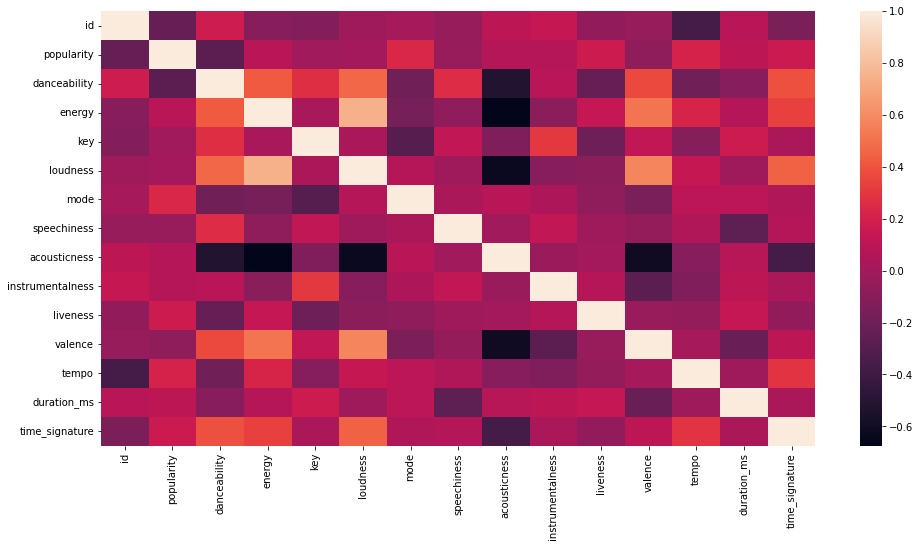

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=False, fmt='.2f')

<AxesSubplot:>

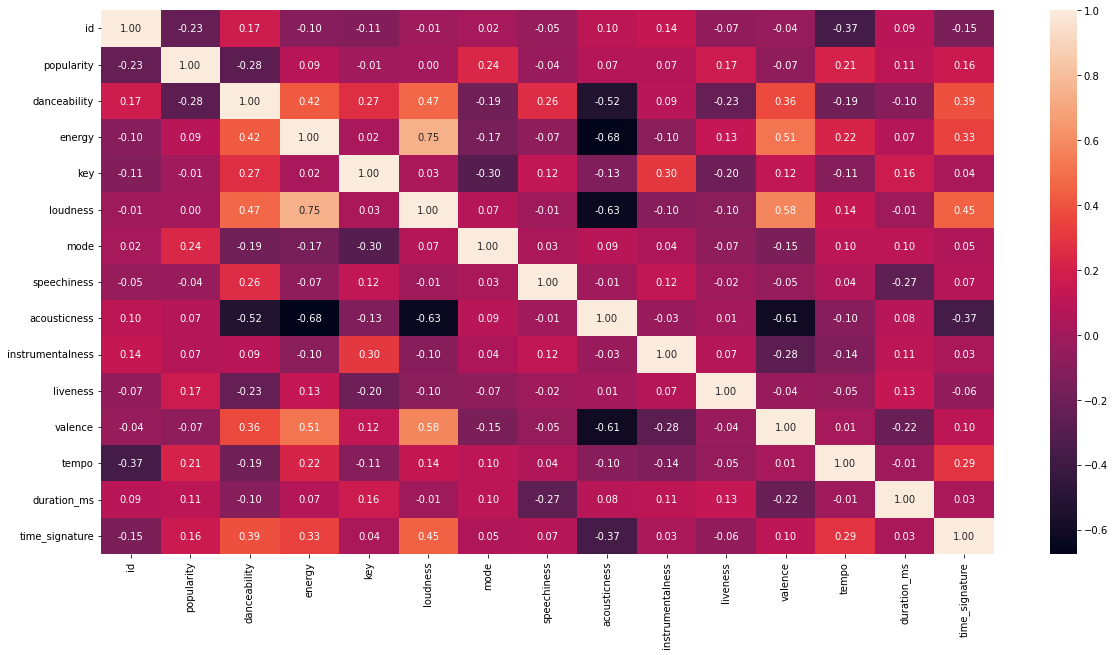

In [9]:
# With annotation
plt.figure(figsize=(20,10))
# Displaying graph
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [10]:
df

id        artist_name                                         track_name  \
0    1     Olivia Rodrigo                                    drivers license   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
3    4     Olivia Rodrigo                                           good 4 u   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
6    7           Doja Cat                           Kiss Me More (feat. SZA)   
7    8         The Weeknd                                    Blinding Lights   
8    9      Glass Animals                                         Heat Waves   
9   10           Måneskin                                            Beggin'   
10  11        Masked Wolf                             Astronaut In The Ocean   
11  12          Bad Bunny                                             DÁKITI   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
13  14         Ed Sheeran                                         Bad Habits   
14  15         The Weeknd                                    Save Your Tears   
15  16                BTS                                             Butter   
16  17         Bruno Mars                                Leave The Door Open   
17  18     Olivia Rodrigo                                            deja vu   
18  19     Rauw Alejandro                                         Todo De Ti   
19  20           24kGoldn                             Mood (feat. iann dior)   
20  21             Tiësto                                       The Business   
21  22                BTS                                           Dynamite   
22  23          Bad Bunny                                           Yonaguni   
23  24       Harry Styles                                   Watermelon Sugar   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
25  26         Kali Uchis                                          telepatía   
26  27      The Kid LAROI                                        WITHOUT YOU   
27  28             Giveon                             Heartbreak Anniversary   
28  29     Olivia Rodrigo                                            traitor   
29  30            Farruko                                              Pepas   
30  31      Ariana Grande                                          positions   
31  32      Lewis Capaldi                                  Someone You Loved   
32  33        Myke Towers                                            Bandido   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
34  35             Polo G                                            RAPSTAR   
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
36  37           Doja Cat                                            Streets   
37  38  The Neighbourhood                                    Sweater Weather   
38  39    Los Legendarios                                               Fiel   
39  40           Doja Cat                                       Need to Know   
40  41           Dua Lipa                                    Don't Start Now   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
42  43           Doja Cat                                              Woman   
43  44    Duncan Laurence                                             Arcade   
44  45                SZA                                          Good Days   
45  46           J Balvin                                      Qué Más Pues?   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
47  48      Ariana Grande                                              34+35   
48  49         Tate McRae                                 you broke me first   
49  

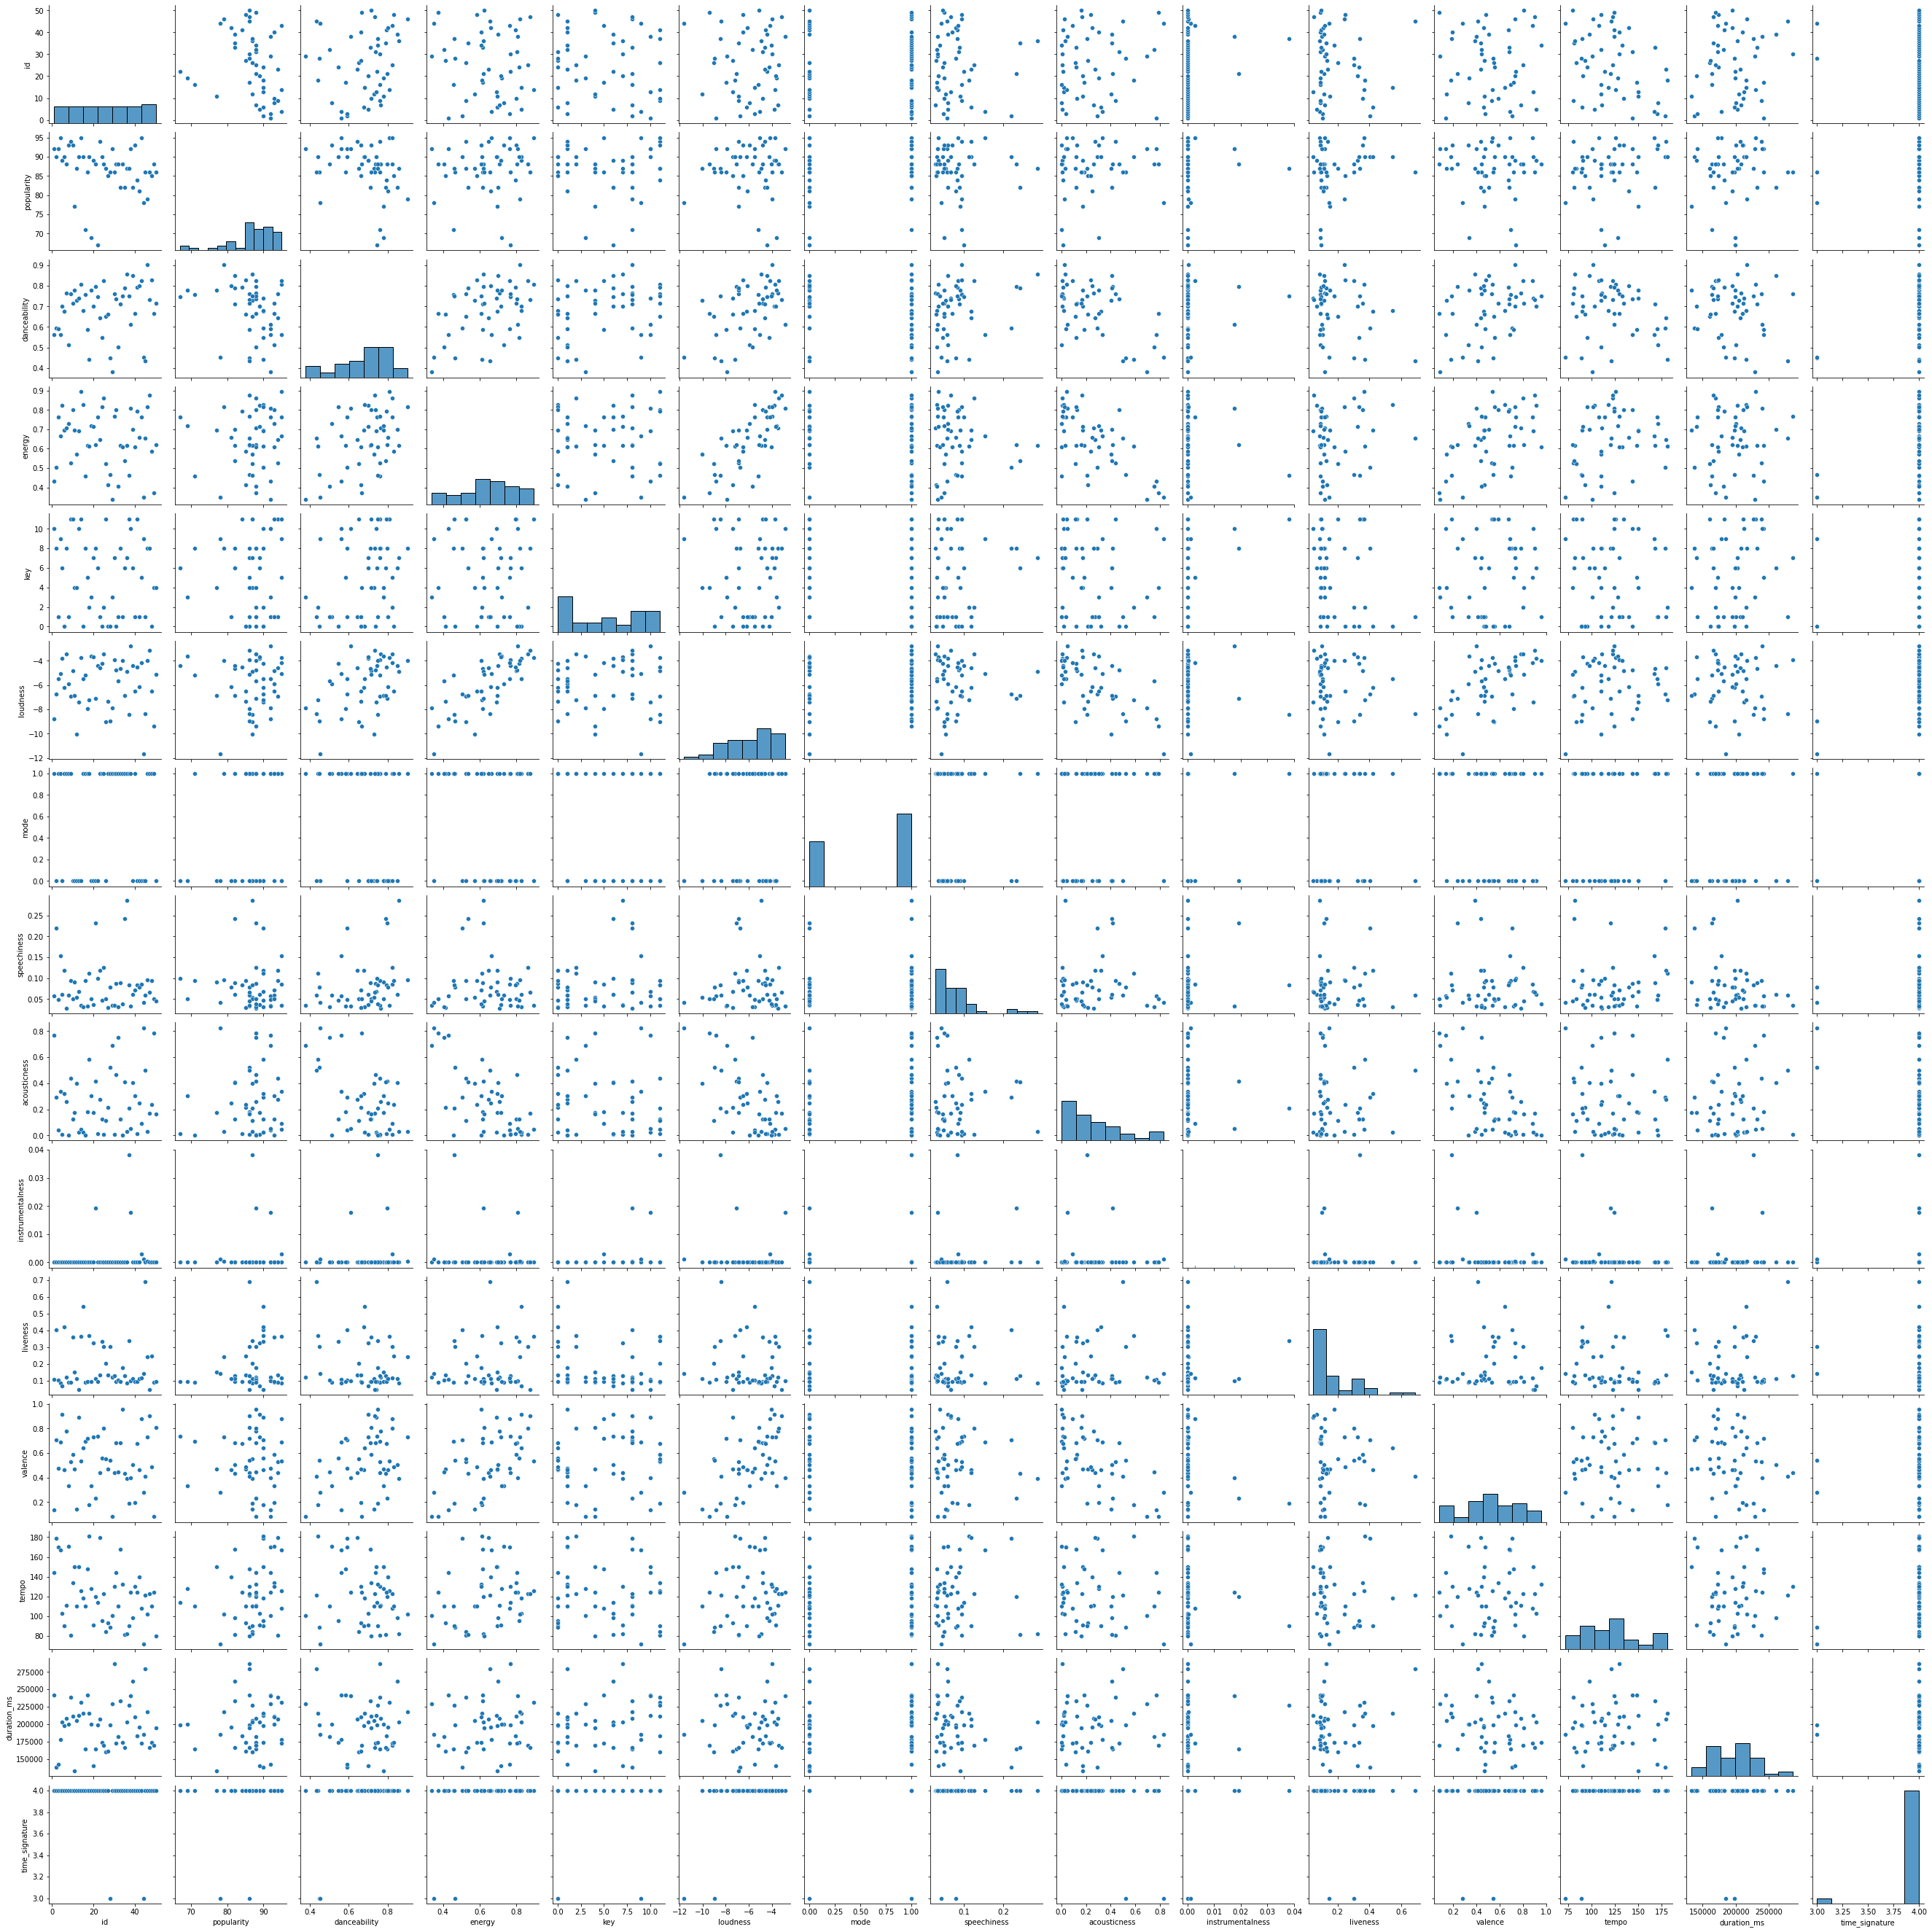

In [11]:
# representing the data in a pairplot()
sns.pairplot(df)

Text(0.5, 1.0, 'Hisogram plot')

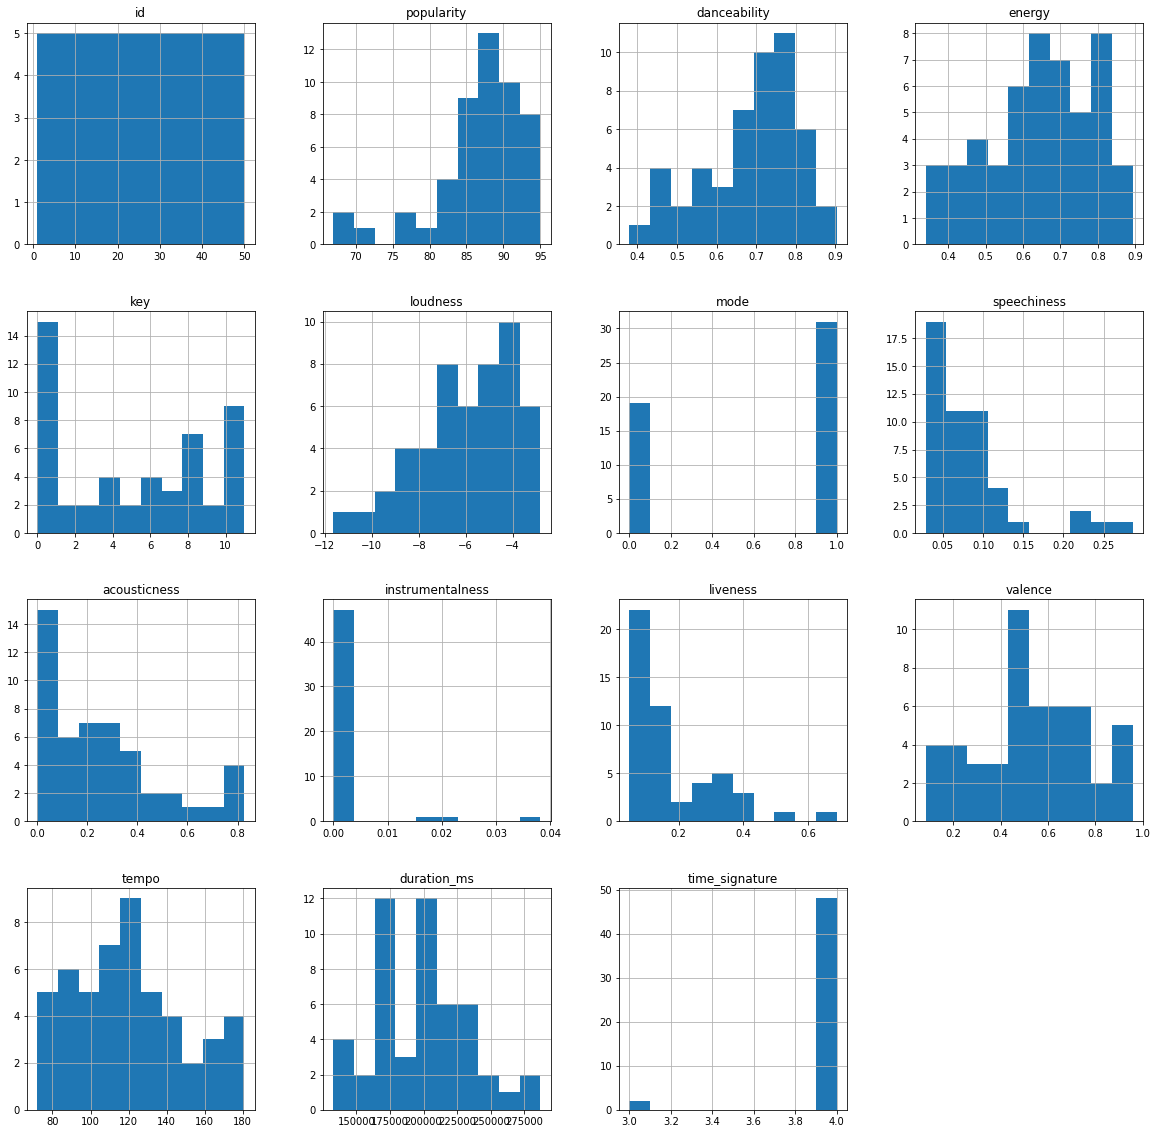

In [12]:
df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

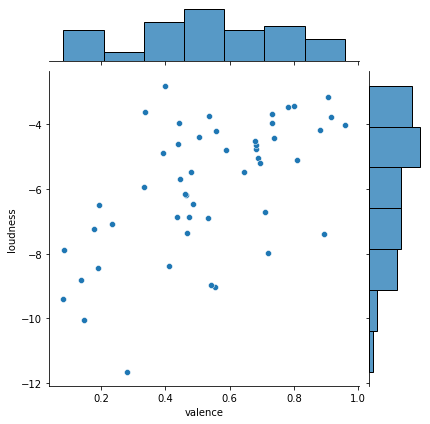

In [13]:
# Ploting scatter
sns.jointplot(x='valence',y='loudness',data=df,kind='scatter')
plt.show()

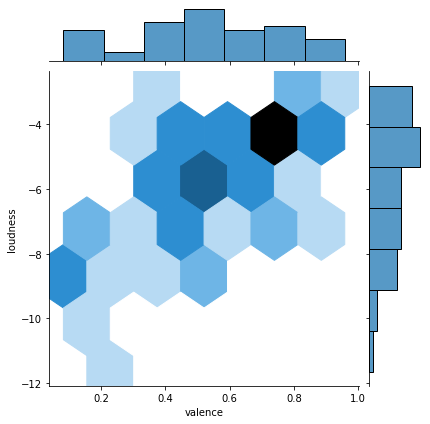

In [14]:
# Plotting HEX boxes
sns.jointplot(x='valence',y='loudness',data=df,kind='hex')
plt.show()

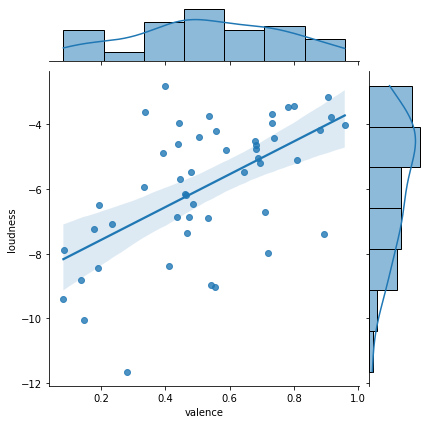

In [15]:
# Plotting Regression
sns.jointplot(x='valence',y='loudness',data=df,kind='reg')
plt.show()

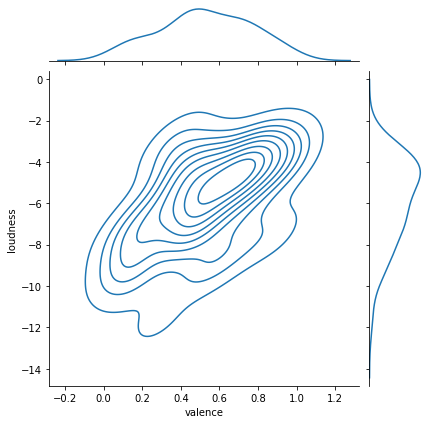

In [16]:
# Plotting KDE
sns.jointplot(x='valence',y='loudness',data=df,kind='kde')
plt.show()

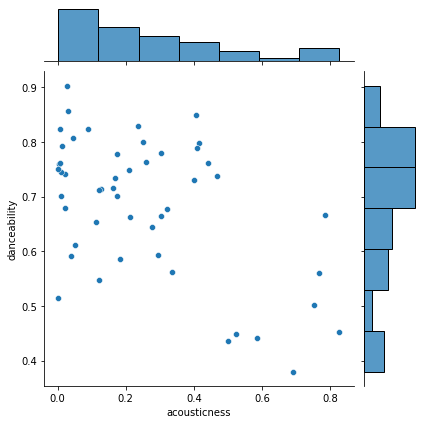

In [17]:
# Plotting Scatter
sns.jointplot(x='acousticness',y='danceability',data=df,kind='scatter')
plt.show()

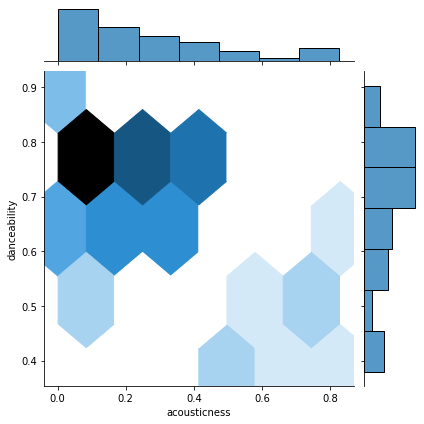

In [18]:
# Plotting Hex
sns.jointplot(x='acousticness',y='danceability',data=df,kind='hex')
plt.show()

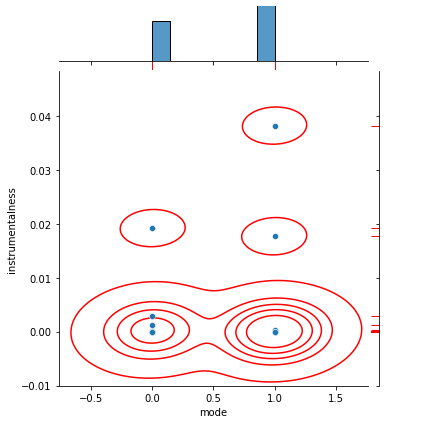

In [19]:
g = sns.jointplot(data=df, x="mode", y="instrumentalness")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

<AxesSubplot:xlabel='energy', ylabel='loudness'>

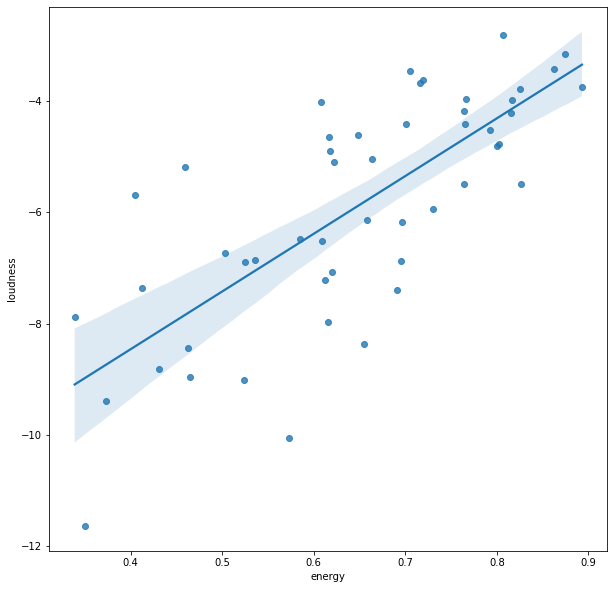

In [20]:
# relation between energy and loudness(db)
fig=plt.figure(figsize=(10,10))
sns.regplot(data=df,x='energy',y='loudness')

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow">Top 10 Artist of 2021</div>

In [21]:
df['Count']=1
df_artist=df.groupby('artist_name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

artist_name  Count
5         Doja Cat      4
24  Olivia Rodrigo      4
3        Bad Bunny      3
19       Lil Nas X      2
2              BTS      2
33      The Weeknd      2
6         Dua Lipa      2
31   The Kid LAROI      2
1    Ariana Grande      2
23        Måneskin      2

In [22]:
df_artist

artist_name  Count
5            Doja Cat      4
24     Olivia Rodrigo      4
3           Bad Bunny      3
19          Lil Nas X      2
2                 BTS      2
33         The Weeknd      2
6            Dua Lipa      2
31      The Kid LAROI      2
1       Ariana Grande      2
23           Måneskin      2
26     Rauw Alejandro      1
22        Myke Towers      1
25             Polo G      1
0            24kGoldn      1
27              Riton      1
28                SZA      1
21        Masked Wolf      1
30         Tate McRae      1
32  The Neighbourhood      1
29    Sebastian Yatra      1
17         Kali Uchis      1
20    Los Legendarios      1
18      Lewis Capaldi      1
16      Justin Bieber      1
15         Joel Corry      1
14           J Balvin      1
13     Internet Money      1
12       Harry Styles      1
11      Glass Animals      1
10             Giveon      1
9             Farruko      1
8          Ed Sheeran      1
7     Duncan Laurence      1
4          Bruno Mars      1
34             Tiësto      1

In [23]:
fig = px.bar(df_artist.head(10),x='artist_name', y='Count',text_auto=True)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title="Top 10 Artist of 2021",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [24]:
fig=px.pie(df_artist.head(10),values='Count',names='artist_name',hole=0.4)
fig.update_layout(title='Top 10 Artist of 2021',font_size=15,title_x=0.45,annotations=[dict(text='Artist',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Top 10 Track of 2021</div>

In [25]:
df_top_tracks=df.sort_values(by='popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1
df_top_tracks

id        artist_name       track_name                track_id  \
1   43           Doja Cat            Woman  6Uj1ctrBOjOas8xZXGqKk4   
2    4     Olivia Rodrigo         good 4 u  4ZtFanR9U6ndgddUvNcjcG   
3   14         Ed Sheeran       Bad Habits  3rmo8F54jFF8OgYsqTxm5d   
4   23          Bad Bunny         Yonaguni  2JPLbjOn0wPCngEot2STUS   
5    9      Glass Animals       Heat Waves  02MWAaffLxlfxAUY7c5dvx   
6   40           Doja Cat     Need to Know  3Vi5XqYrmQgOYBajMWSvCi   
7    8         The Weeknd  Blinding Lights  0VjIjW4GlUZAMYd2vXMi3b   
8   10           Måneskin          Beggin'  3Wrjm47oTz2sjIgck11l5e   
9    1     Olivia Rodrigo  drivers license  5wANPM4fQCJwkGd4rN57mH   
10  38  The Neighbourhood  Sweater Weather  2QjOHCTQ1Jl3zawyYOpxh6   

    popularity  danceability  energy  key  loudness  mode  speechiness  \
1           95         0.824   0.764    5    -4.175     0       0.0854   
2           95         0.563   0.664    9    -5.044     1       0.1540   
3           95         0.807   0.893   11    -3.745     0       0.0347   
4           94         0.644   0.648    1    -4.601     1       0.1180   
5           94         0.761   0.525   11    -6.900     1       0.0944   
6           93         0.664   0.609    1    -6.509     1       0.0707   
7           93         0.514   0.730    1    -5.934     1       0.0598   
8           93         0.714   0.800   11    -4.808     0       0.0504   
9           92         0.561   0.431   10    -8.810     1       0.0578   
10          92         0.612   0.807   10    -2.810     1       0.0336   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1        0.08880          0.002940    0.1170    0.881  107.998       172627   
2        0.33500          0.000000    0.0849    0.688  166.928       178147   
3        0.04510          0.000028    0.3660    0.537  126.011       230747   
4        0.27600          0.000000    0.1350    0.440  179.951       206710   
5        0.44000          0.000007    0.0921    0.531   80.870       238805   
6        0.30400          0.000000    0.0926    0.194  130.041       210560   
7        0.00146          0.000095    0.0897    0.334  171.005       200040   
8        0.12700          0.000000    0.3590    0.589  134.002       211560   
9        0.76800          0.000014    0.1060    0.137  143.875       242013   
10       0.04950          0.017700    0.1010    0.398  124.053       240400   

    time_signature  Count  
1                4      1  
2                4      1  
3                4      1  
4                4      1  
5                4      1  
6                4      1  
7                4      1  
8                4      1  
9                4      1  
10               4      1

In [26]:
fig = px.bar(df_top_tracks, x=['good 4 u','Woman','Bad Habits','Yonaguni','Heat Waves','Blinding Lights',
                               'Beggin','Need to Know','drivers license','STAY (with Justin Bieber)'], y='popularity',text_auto=True)
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Top 10 Tracks of 2021',
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [27]:
fig=px.pie(df_top_tracks,values='popularity',names=['good 4 u','Woman','Bad Habits','Yonaguni','Heat Waves','Blinding Lights',
                               'Beggin','Need to Know','drivers license','STAY (with Justin Bieber)'],hole=0.45)
fig.update_layout(title='Top 10 Tracks of 2021',font_size=15,title_x=0.45,annotations=[dict(text='Tracks',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Pie-distribution of Key with different Audio Characteristics</div>

In [28]:
fig=px.pie(df,values='valence',names='key',hole=0.35)
fig.update_layout(title='The distribution of valence and key ',font_size=15,title_x=0.45,annotations=[dict(text='valance',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [29]:
fig=px.pie(df,values='acousticness',names='key',hole=0.55)
fig.update_layout(title='The distribution of acousticness and key ',font_size=15,title_x=0.45,annotations=[dict(text='acousticness',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [30]:
fig=px.pie(df,values='speechiness',names='key',hole=0.55)
fig.update_layout(title='The distribution of speechiness and key ',font_size=15,title_x=0.45,annotations=[dict(text='speechiness',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## <div style="border-radius:100px;padding:10px; font-size:40px;text-align:center;background-color:green; color:yellow"> Scatter distribution of Popularity with different Audio Characteristics.</div>

In [31]:
fig = px.scatter(df, x="popularity", y="energy")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Energy effect on popularity')
fig.show()

In [32]:
fig = px.scatter(df, x="popularity", y="loudness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Loudness effect on popularity')
fig.show()

In [33]:
fig = px.scatter(df, x="popularity", y="speechiness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Speechiness effect on popularity')
fig.show()

In [34]:
fig = px.scatter(df, x="popularity", y="acousticness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Acousticness effect on popularity')
fig.show()

In [35]:
fig = px.scatter(df, x="popularity", y="tempo")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Tempo effect on popularity')
fig.show()

In [36]:
fig = px.scatter(df, x="popularity", y="valence")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Valence effect on popularity')
fig.show()


Appriciate the work, if you liked it. 